#  Regression on House Pricing Dataset: Variable Selection & Regularization
We consider a reduced version of a dataset containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

[https://www.kaggle.com/harlfoxem/housesalesprediction]

For each house we know 19 house features (e.g., number of bedrooms, number of bathrooms, etc.) plus its price, that is what we would like to predict.

## TO DO: insert your ID number ("numero di matricola") below

In [3]:


#put here your ``numero di matricola''
numero_di_matricola = 999999 # COMPLETE

In [4]:
#import all packages needed
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data, remove data samples/points with missing values (NaN) and take a look at them.

In [5]:
#load the data
df = pd.read_csv('kc_house_data.csv', sep = ',')

#remove the data samples with missing values (NaN)
df = df.dropna() 

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.164000e+03,3.164000e+03,3164.000000,3164.000000,3164.000000,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,4.645240e+09,5.354358e+05,3.381163,2.071903,2070.027813,1.525054e+04,1.434893,0.009798,0.244311,3.459229,7.615676,1761.252212,308.775601,1967.489254,94.668774,98077.125158,47.557868,-122.212337,1982.544564,13176.302465
std,2.854203e+09,3.809004e+05,0.895472,0.768212,920.251879,4.254457e+04,0.507792,0.098513,0.776298,0.682592,1.166324,815.934864,458.977904,28.095275,424.439427,54.172937,0.140789,0.139577,686.256670,25413.180755
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,620.000000,660.000000
25%,2.199775e+09,3.150000e+05,3.000000,1.500000,1430.000000,5.453750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,98032.000000,47.459575,-122.324250,1480.000000,5429.500000
50%,4.027701e+09,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,0.000000,1969.000000,0.000000,98059.000000,47.572500,-122.226000,1830.000000,7873.000000
75%,7.358175e+09,6.402500e+05,4.000000,2.500000,2500.000000,1.122250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,98117.000000,47.680250,-122.124000,2360.000000,10408.250000
max,9.839301e+09,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


Extract input and output data. We want to predict the price by using othr features (other than id) as input.

In [6]:
Data = df.values
# m = number of input samples
m = 3164
Y = Data[:m,2]
X = Data[:m,3:]


## Data Pre-Processing

Split the data into training  set of $m_{train}$ samples, validaion set of $mN_{val}$ samples and a test set of $m_{test}:=m-m_{train}-m_{val}$ samples.

In [7]:
# Split data into train (50 samples) and test data (the rest)
m_train = 60

m_test = m - m_train 
from sklearn.cross_validation import train_test_split

XtrainOLS, Xtest, YtrainOLS, Ytest = train_test_split(X, Y, test_size=m_test/m, random_state=numero_di_matricola)



/Users/vandinfa/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Standardize the data.

In [8]:
# Data pre-processing
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(XtrainOLS)
XtrainOLS = scaler.transform(XtrainOLS)

Xtest = scaler.transform(Xtest)


/Users/vandinfa/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Least-Squares Solution

The routine LinearRegression.score(X,y) computes the *Coefficient of determination* $R^2$, defined as:

$$R^2 = 1- \frac{RSS}{TSS}$$

where $RSS$ is the *Residual Sum of Squares* and $TSS$ is the *Total Sum of Square*. Denoting with $\hat{y}_i$ the $i$-th predicted output values, they are so defined:

\begin{align*}
RSS &= \sum_{i=1}^m (y_i - \hat{y}_i)^2\\
TSS &= \sum_{i=1}^m (y_i -\bar{y}_i)^2, \qquad \qquad \bar{y}_i=\frac{1}{m} \sum_{i=1}^m y_i
\end{align*}

In this notebook we will mostly use the coefficient of determination $R^2$ (instead of the RSS) as a measure to compare models and choose tuning parameters.

### TODO 1

Answer the following: are we interested  in models with low $R^2$ or high $R^2$? Why? (max 5 lines)

Now compute the Least-Squares estimate using LinearRegression() in Scikit-learn, and print the corresponding score in training and test data.

In [9]:
# Least-Squares
from sklearn import linear_model 
#OLS is the linear regression model
OLS = linear_model.LinearRegression()

#fit the model on training data
OLS.fit(XtrainOLS, YtrainOLS)

#obtain predictions on training data
Yhat_tr = OLS.predict(XtrainOLS)


#coefficients from the model
b_LS = np.hstack((OLS.intercept_, OLS.coef_))

print "Coefficient of determination on training data:", OLS.score(XtrainOLS,YtrainOLS)
print "Coefficient of determination on test data:", OLS.score(Xtest,Ytest)


Coefficient of determination on training data: 0.780988319911
Coefficient of determination on test data: 0.55485560139


### Confidence Intervals

We now compute the confidence interval for each coefficient.

In [10]:
# Least-Squares: Confidence Intervals
from scipy.stats import t

Xtrain_im_testrcept = np.hstack((np.ones((XtrainOLS.shape[0],1)), XtrainOLS))

#alpha for confidence im_testrvals
alpha = 0.05

#quantile from t-student distribution
tperc = t.ppf(1-alpha/2, m_train-XtrainOLS.shape[1]-1, loc=0, scale=1)
sigma2 = np.linalg.norm(YtrainOLS-Yhat_tr)**2/(m_train-XtrainOLS.shape[1]-1)

R = np.dot(Xtrain_im_testrcept.transpose(),Xtrain_im_testrcept)
Ur, Sr, Vr = np.linalg.svd(R, full_matrices=1, compute_uv=1)


Sri = (1/Sr)*(Sr>0)
Sri = Sri*(Sri<1e10)

print Sri

Ri2 = np.dot(Ur,np.dot(np.diag(Sri),np.transpose(Ur)))

Ri = np.linalg.pinv(R)

print np.diag(Ri)
print np.diag(Ri2)


v = np.sqrt(np.diag(Ri))
Delta = np.sqrt(sigma2)*v*tperc
CI = np.transpose(np.vstack((b_LS,b_LS))) + np.transpose(np.vstack((-Delta,+Delta) ))

[ 0.00305639  0.00592208  0.00780731  0.0141748   0.01564276  0.01666667
  0.01698437  0.0245186   0.02665142  0.03327316  0.04047261  0.0501885
  0.0599602   0.084716    0.10264664  0.14985951  0.21605243  0.          0.        ]
[  1.66666667e-02   4.56704332e-02   9.34531097e-02   3.93128705e-02
   5.49899410e-02   3.34170344e-02   7.89426553e-33   2.85921736e-02
   2.35372792e-02   9.22073275e-02   5.71353734e-02   2.76556345e-02
   6.50173068e-02   2.12239482e-02   4.10032494e-02   3.08401838e-02
   7.19963786e-02   7.28546929e-02   5.30198524e-02]
[  1.66666667e-02   4.56704332e-02   9.34531097e-02   3.93128705e-02
   5.49899410e-02   3.34170344e-02   5.36321397e-32   2.85921736e-02
   2.35372792e-02   9.22073275e-02   5.71353734e-02   2.76556345e-02
   6.50173068e-02   2.12239482e-02   4.10032494e-02   3.08401838e-02
   7.19963786e-02   7.28546929e-02   5.30198524e-02]


Plot the LS coefficients and their confidence im_testrval.

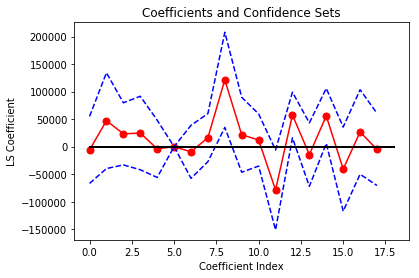

In [11]:
# Plot confidence im_testrvals
plt.figure(1)
plt.plot(b_LS[1:], 'r', marker='o', ms=7.0)
plt.plot(CI[1:,0], 'b--')
plt.plot(CI[1:,1], 'b--')
plt.plot(np.zeros(b_LS.shape[0],), 'k', linewidth=2.0)
plt.xlabel('Coefficient Index')
plt.ylabel('LS Coefficient')
plt.title('Coefficients and Confidence Sets')
plt.show()

### Question: based on the results above, if you had to choose at most 5 features for a linear regression model, which ones would you choose? Why?

### TODO 3
Answer the question above (max 5 lines)

## Best-Subset Selection

Splitting the OLS training data into a training data and validation dataset perform best-subset selection. 

For $k$ going from 1 to $n_{sub}=4$:
1. Compute the LS estimate using all the possible subsets of $k$ features
2. Compute the prediction error on the validation dataset

Finally we choose the subset of $k^*$ features givein the lowest validation error.


In [12]:
import itertools
import math 

m_trainBSS=int(math.ceil(m_train/2))
m_valBSS=m_train-m_trainBSS


Xtrain = XtrainOLS[:m_trainBSS,:]
Ytrain = YtrainOLS[:m_trainBSS]
Xval = XtrainOLS[m_trainBSS:,:]
Yval = YtrainOLS[m_trainBSS:,]


nsub = 4
features_idx_dict = {}
validation_err_dict = {}
validation_err_min = np.zeros(nsub,)
validation_err_min_idx = np.zeros(nsub, dtype=np.int64)
for k in range(1,nsub+1):
    features_idx = list(itertools.combinations(range(Xtrain.shape[1]),k))
    validation_error = np.zeros(len(features_idx),)
    for j in range(len(features_idx)):
        OLS_subset = linear_model.LinearRegression()
        OLS_subset.fit(Xtrain[:,features_idx[j]], Ytrain)
        validation_error[j] = 1 - OLS_subset.score(Xval[:,features_idx[j]], Yval)
        validation_error[j] = 1 - OLS_subset.score(Xtest[:,features_idx[j]], Ytest)
    validation_err_min[k-1] = np.min(validation_error)    
    validation_err_min_idx[k-1] = np.argmin(validation_error)
    features_idx_dict.update({k: features_idx})
    validation_err_dict.update({k: validation_error})

Plot the validation error as a function of the number of retained features.

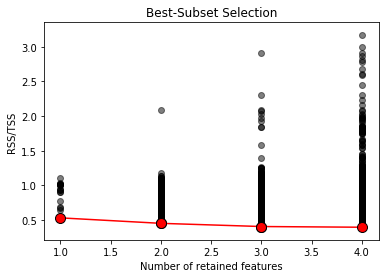

In [13]:
# Plot
plt.figure(2)
for k in range(1,nsub+1):
    plt.scatter(k*np.ones(validation_err_dict[k].shape), validation_err_dict[k], color='k', alpha=0.5)
    #plt.scatter(k, validation_err_min[k-1], color='r', alpha=0.8)
    if k > 1:
        plt.plot([k-1, k], [validation_err_min[k-2], validation_err_min[k-1]], color='r',marker='o', 
            markeredgecolor='k', markerfacecolor = 'r', markersize = 10)
plt.xlabel('Number of retained features')
plt.ylabel('RSS/TSS')
plt.title('Best-Subset Selection')
plt.show()

Compute the LS estimate using the selected subset of features.

### TODO 4: pick the number of features for the best subset according to figure above, learn the model on the entire training data, and compute score on training and on test data

In [14]:
OLS_best_subset = linear_model.LinearRegression()

# now pick the number of features according to best subset
opt_num_features = 4

#opt_features_idx contains the indices of the features from best subset
opt_features_idx = features_idx_dict[opt_num_features][validation_err_min_idx[opt_num_features - 1]]

#let's print the indices of the features from best subset
print opt_features_idx

#fit the best subset on the entire training set
OLS_best_subset.fit(XtrainOLS[:,opt_features_idx], YtrainOLS)

#print the coefficient of determination on training and on test data
print "Coefficient of determination on training data:", OLS_best_subset.score(XtrainOLS[:,opt_features_idx],YtrainOLS)
print "Coefficient of determination on test data:", OLS_best_subset.score(Xtest[:,opt_features_idx],Ytest)

(2, 6, 8, 14)
Coefficient of determination on training data: 0.653158551048
Coefficient of determination on test data: 0.595093386624


### TODO 5: do the features from best subset selection correspond to the ones you would have chosen based on confidence im_testrvals for the linear regression coefficients? Comment (max 5 lines)

## Lasso

### TO DO 6
Use the routine *lasso_path* from *sklearn.linear_regression* to compute the "lasso path" for different values of the regularization parameter $\lambda$. You should first fix a grid a possible values of lambda (the variable "lasso_lams"). For each entry of the vector "lasso_lams" you should compute the corresponding model (The i-th column of the vector  "lasso_coefs" should contain the coefficients of the linear model computed using lasso_lams[i] as regularization parameter).

Be careful that the grid should be chosen appropriately.

Note that the parameter $\lambda$ is called $\alpha$ in the Lasso model from sklearn


In [15]:
from sklearn.linear_model import lasso_path

# select a grid of possible regularization parameters 
# (be carefull how this is chosen, you may have to refine the choice after having seen the results)

lasso_lams = np.logspace(0,6,num = 100)

# Use the function lasso_path to compute the "lasso path", passing in input the lambda values
# you have specified in lasso_lams
lasso_lams, lasso_coefs, _ = lasso_path(XtrainOLS, YtrainOLS, alphas = lasso_lams) 



Evaluate the sparsity in the estimated coefficients as a function of the regularization parameter $\lambda$: to this purpose, compute the number of non-zero entries in the estimated coefficient vector.

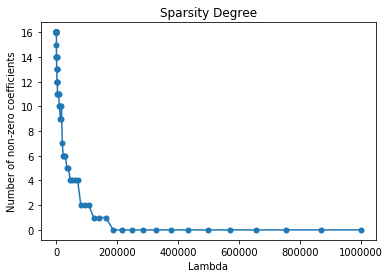

In [16]:
l0_coef_norm = np.zeros(len(lasso_lams),)

for i in range(len(lasso_lams)):
    l0_coef_norm[i] = sum(lasso_coefs[:,i]!=0)


plt.figure(6)
plt.plot(lasso_lams, l0_coef_norm, marker='o', markersize=5)
plt.xlabel('Lambda')
plt.ylabel('Number of non-zero coefficients')
plt.title('Sparsity Degree')
plt.show()

### TODO 7: explain the results in the figure above (max 5 lines)

### TODO 8: Use k-fold Cross-Validation to fix the regularization parameter

Use the scikit-learn built-in routine *Lasso* (from the *linear_regression* package) to compute the lasso  coefficients.

Use *KFold* from *sklearn.cross_validation* to split the data i.e. XtrainOLS and YtrainOLS) into the desired number of folds.

The pick $lam\_opt$ to be the chosen value for the regularization parameter.

In [17]:
from sklearn.cross_validation import KFold
num_folds = 5

kf = KFold(n=m_train, n_folds = num_folds)

#loss_ridge_kfold will contain the value of the loss
loss_lasso_kfold = np.zeros(len(lasso_lams),)

for i in range(len(lasso_lams)):
    
    #define a lasso model   using Lasso() for the i-th value of lam_values
    lasso_kfold = linear_model.Lasso(alpha=lasso_lams[i])
    for train_index, validation_index in kf:
        Xtrain_kfold, Xva_kfold = XtrainOLS[train_index], XtrainOLS[validation_index]
        Ytrain_kfold, Yva_kfold = YtrainOLS[train_index], YtrainOLS[validation_index]
        
        #learn the model using the training data from the k-fold
        lasso_kfold.fit(Xtrain_kfold, Ytrain_kfold)
        #compute the loss using the validation data from the k-fold
        loss_lasso_kfold[i] += np.linalg.norm(Yva_kfold - lasso_kfold.predict(Xva_kfold))**2

loss_lasso_kfold /= m_train

#choose the regularization parameter that minimizes the loss
lasso_lam_opt = lasso_lams[np.argmin(loss_lasso_kfold)]
print "Best value of the regularization parameter:", lasso_lam_opt

/Users/vandinfa/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best value of the regularization parameter: 7564.63327555


Plot the Cross-Validation estimate of the prediction error as a function of the regularization parameter

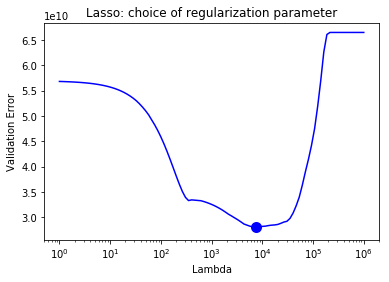

Total number of coefficients: 18
Number of non-zero coefficients: 17
Best value of regularization parameter: 7564.63327555


In [18]:
plt.figure(4)
plt.xscale('log')
plt.plot(lasso_lams, loss_lasso_kfold, color='b')
plt.scatter(lasso_lams[np.argmin(loss_lasso_kfold)], loss_lasso_kfold[np.argmin(loss_lasso_kfold)], color='b', marker='o', linewidths=5)
plt.xlabel('Lambda')
plt.ylabel('Validation Error')
plt.title('Lasso: choice of regularization parameter')
plt.show()
print "Total number of coefficients:", len(lasso_kfold.coef_)
print "Number of non-zero coefficients:", sum(lasso_kfold.coef_ != 0)
print "Best value of regularization parameter:", lasso_lam_opt


### TO DO 9 now estimate the lasso coefficients using all the training data and the optimal regularization parameter (chosen at previous step)

In [19]:
# Estimate Lasso  Coefficients with all data (trainval) for the the optimal value lasso_lam_opt of the regularization paramter

#define the model
lasso_reg = linear_model.Lasso(alpha=lasso_lam_opt)
#fit using the training data
lasso_reg.fit(XtrainOLS,YtrainOLS)
#lasso_reg.fit(Xtrain,Ytrain)

print "Coefficient of determination on training data:", lasso_reg.score(XtrainOLS,YtrainOLS)
print "Coefficient of determination on test data:", lasso_reg.score(Xtest,Ytest)

Coefficient of determination on training data: 0.769194050196
Coefficient of determination on test data: 0.554884697318


Compare the LS and the lasso  coefficients.

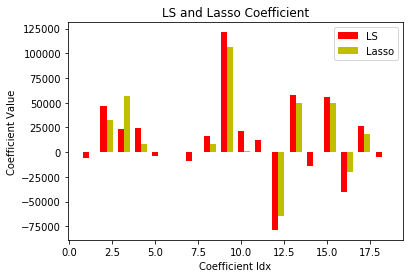

In [20]:
# Compare LS and lasso coefficients
ind = np.arange(1,len(OLS.coef_)+1)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, OLS.coef_, width, color='r')
rects2 = ax.bar(ind + width, lasso_reg.coef_, width, color='y')
ax.legend((rects1[0], rects2[0]), ('LS', 'Lasso'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('LS and Lasso Coefficient')
plt.show()

## Evaluate the performance on the test set



In [21]:
print "Coefficient of determination of LS on test data:", OLS.score(Xtest,Ytest)
print "Coefficient of determination of LS (with subset selection) on test data:", OLS_best_subset.score(Xtest[:,opt_features_idx],Ytest)
print "Coefficient of determination of LASSO on test data:", lasso_reg.score(Xtest,Ytest)

Coefficient of determination of LS on test data: 0.55485560139
Coefficient of determination of LS (with subset selection) on test data: 0.595093386624
Coefficient of determination of LASSO on test data: 0.554884697318


### TODO 14: comment and compare the results obtained by the different methods (max 5 lines)

### SUGGESTION (not compulsory): repeat the same as above use different data size, and try to understand the main differences

